In [24]:
from datascience import*
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams['patch.force_edgecolor'] = True

In [25]:
#HISTOGRAMS
#ALL NUMBERS MUST ADD UP TO A 100
#FOR EACH VALUE OF X, THERE EXISTS ONLY ONE VALUE OF Y

# Categorical Distribution

In [26]:
parent_responses = Table().with_columns(
    
    'How confident', make_array('Not too / not at all', 'Somewhat', 'Very'),
    'Percent', make_array(16, 45, 39)
)
parent_responses

How confident,Percent
Not too / not at all,16
Somewhat,45
Very,39


In [27]:
sum(parent_responses.column('Percent'))

100

In [28]:
#Notice that in the block below,
#only the categorical variable has been passed. 
#It automatically tries to create a bar chart with one of the numerical values

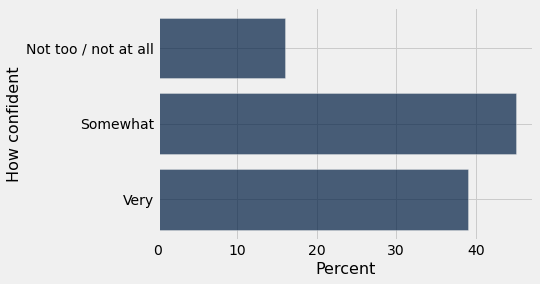

In [37]:
parent_responses.barh('How confident')

## Categorigal Distribution: Finding the Counts

In [46]:
age = []
top_movies = Table.read_table('movies.csv')


   

top_movies



Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [38]:
studio = top_movies.select('Studio')
studios.show(4)

Studio
MGM
Fox
Fox
Universal


In [32]:
#Group takes the original table,
#groups the rows of that according to the value of the variable
#and simply counts the rows

In [39]:
studio_distribution = studio.group('Studio')
studio_distribution

Studio,count
Doc?,1
Inc.,1
Mad,1
the Witch and the Wardrobe,1
AVCO,1
Buena Vista,33
Columbia,9
Disney,11
Dreamworks,3
Fox,24


In [40]:
sum(studio_distribution.column('count'))

200

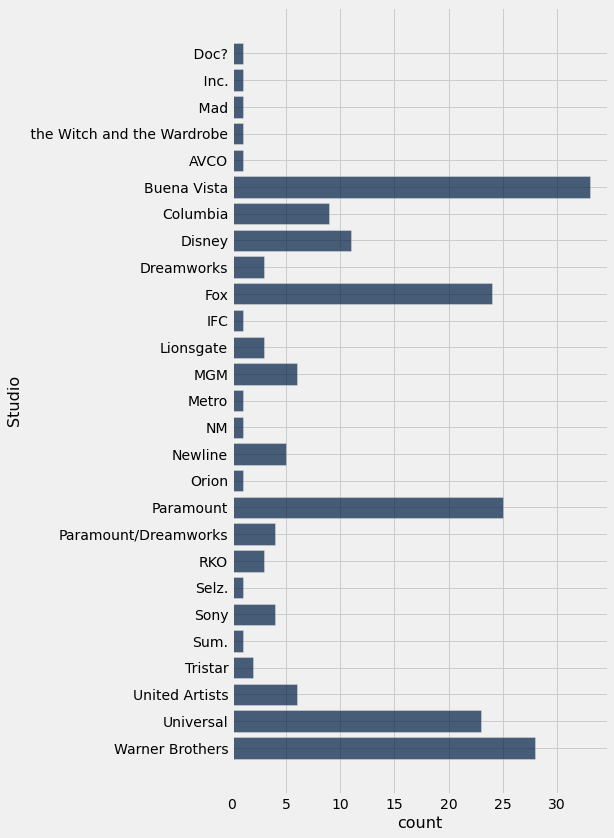

In [41]:
studio_distribution.barh('Studio')

#.group() also puts it in alphabetical order

In [ ]:
#After sorting, it becomes much easier to visualize

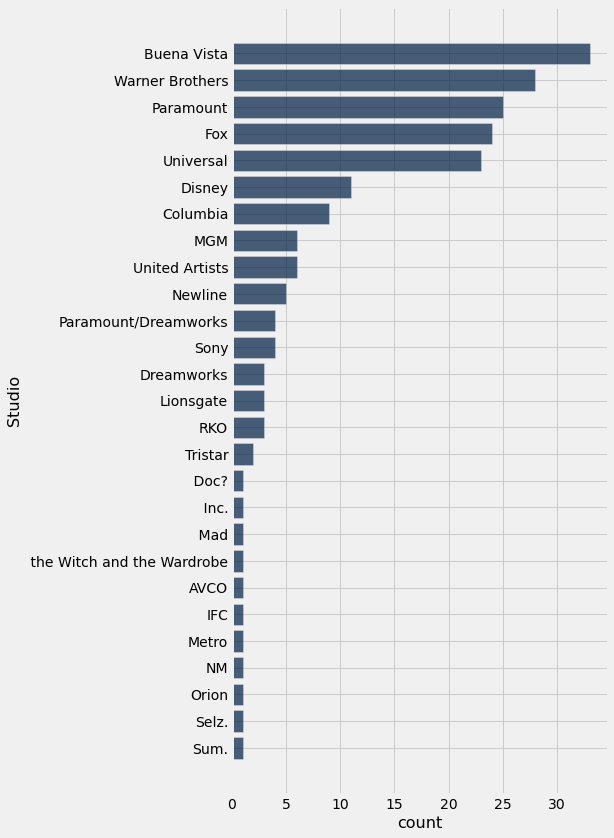

In [42]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Distributions of Quantitative Variables

In [43]:
#Time, length, ages 
#Such quantitative variables do not have a predefined grouping like in the case 
#above

In [44]:
#====BINNING====
#Counting the number of numerical variables that lie within ranges, called bins
#Defined by their lower bounds
#Upper bound is the lower bound of the next bin

In [50]:
#Notice
#Did not need a loop[]
#age_new = np.round(2022 - age)
#or
ages= 2021 - top_movies.column('Year')

top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,82
Star Wars,Fox,460998007,1583483200,1977,44
The Sound of Music,Fox,158671368,1266072700,1965,56
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,39
Titanic,Paramount,658672302,1204368000,1997,24
The Ten Commandments,Paramount,65500000,1164590000,1956,65
Jaws,Universal,260000000,1138620700,1975,46
Doctor Zhivago,MGM,111721910,1103564200,1965,56
The Exorcist,Warner Brothers,232906145,983226600,1973,48
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,84


## HOW TO FIND THE BIN

## Finding the Counts: Binning

In [51]:
min(ages), max(ages)

(4, 100)

In [53]:
equal_bins = top_movies.bin('Age', bins=np.arange(0, 101, 20))
equal_bins

bin,Age count
0,67
20,60
40,46
60,21
80,6
100,0


In [54]:
#Last bin gives the boundary of the last bin. Always 0

#67 in [0-20)
#46 movies in the [40-60) bins
#Age count of the movies



In [55]:
sum(equal_bins.column('Age count'))

200

In [57]:
#To get the number of movies whose ages are more than 40 years and less than 60

In [56]:
top_movies.where('Age', are.above_or_equal_to(40)).where('Age', are.below(60)).num_rows

46

In [58]:
#Basically, as shown above, the last bin has 0 movies that are 100 years or older

In [59]:
top_movies.where('Age', 100)

Title,Studio,Gross,Gross (Adjusted),Year,Age
The Four Horsemen of the Apocalypse,Metro,9183673,408214300,1921,100


In [63]:
top_movies.where('Age', are.above_or_equal_to(80)).where('Age', are.below(100)).num_rows

5

In [66]:
top_movies.where('Age', are.above_or_equal_to(80)).where('Age', are.below(100))

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,82
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,84
Fantasia,Disney,76408097,738256500,1941,80
Pinocchio,Disney,84254167,599215600,1940,81
Sergeant York,Warner Brothers,16361885,427815200,1941,80


In [67]:
top_movies.where('Age', are.above_or_equal_to(80)).where('Age', are.below_or_equal_to(100))

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,82
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,84
Fantasia,Disney,76408097,738256500,1941,80
Pinocchio,Disney,84254167,599215600,1940,81
Sergeant York,Warner Brothers,16361885,427815200,1941,80
The Four Horsemen of the Apocalypse,Metro,9183673,408214300,1921,100


In [69]:
#The last movie appears in the bin 80-100
#Such a convention is necessary and followed i.e. the (second) last bin 
#is [80-100] and not [80,100)



#The [40,60) bin contains 46 out of 200 movies = 23%
#The bin is 20 years wide

#Area = height x width
#Therefore (height bar) = Area/(width) of the bin
#Height bar = PERCENT/YEARS
#Height measures the percent of data in the bin 
#relative to the amount of space in the bin.
#Height measures crowdedness or density

#How many individuals in the bin? Use area
#How crowded is the bin? Use height

#When you would need unequal bins
#To summarize education data
#0-2 Pre-school
#I - IV Primary
#V-X Secondary
#XI-XII Higher Secondary
#and so on


In [72]:
#Bins need not be of equal length

In [88]:
my_bins = make_array(0, 10, 20, 40, 60, 100)

In [78]:
binned_data = top_movies.bin('Age', bins=my_bins)
binned_data

bin,Age count
0,28
10,39
20,60
40,46
60,27
100,0


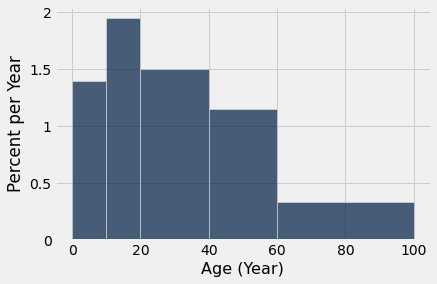

In [89]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

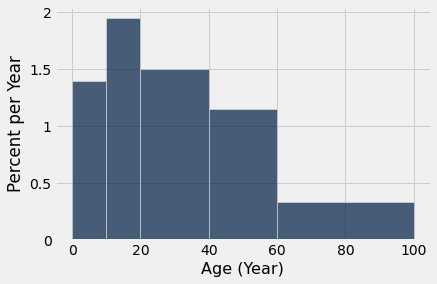

In [90]:
#Plotting the counts on the vertical axis is a bad idea
#Q) Which one has more movies?
#A) [20,40) bigger area

#Q) Which one is more crowded?
#A) [10,20) is taller

top_movies.hist('Age', bins = my_bins, unit = "Year")

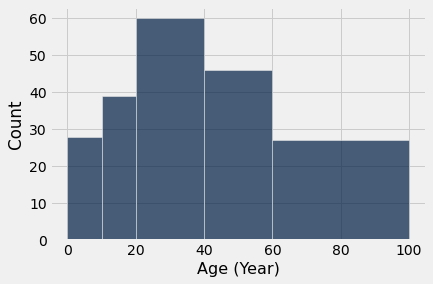

In [91]:
#=====DO NOT DO THIS=====
#DO NOT PLOT JUST THE BARE COUNTS
top_movies.hist('Age', bins = my_bins, unit = "Year", normed=False)

In [79]:
#HOW THE EYE PERCEIVES THE BARS
#See Visualization3

In [80]:
#If you represent 20% of a population by one triangle
#Then 40% can be be represented by two triangles
#====But not by=== (doubling the length and breadth of the first triangle)

#Vertical axis is a rate (Percent/per year)

# Histogram: Percent = Area

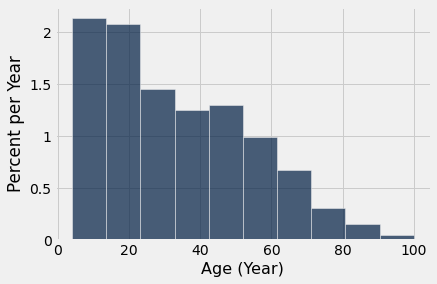

In [82]:
#Not specifying any bins
top_movies.hist('Age', unit = 'Year')

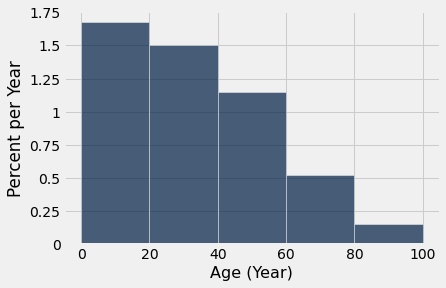

In [84]:
#In this block, it is possible to clearly locate the edges of the bins
top_movies.hist('Age', bins = np.arange(0, 101, 20), unit = 'Year')

In [85]:
1.5*(40-20)

30.0

In [86]:
equal_bins

bin,Age count
0,67
20,60
40,46
60,21
80,6
100,0


In [87]:
total_count = sum(equal_bins.column('Age count'))
60/total_count

0.3